## **Data Engineering Task Notebook**

This notebook is designed to test you through various Data Engineering tasks using the Online Retail II dataset. The tasks will help you develop essential skills in data cleaning, feature engineering, and transforming raw data into valuable insights. You'll explore tasks like handling missing values, aggregating data, creating new features, and performing data joins to simulate real-world data workflows. These tasks will prepare you for more advanced data manipulation and analysis, enhancing your ability to work with large, complex datasets.

# **About the Dataset**
This Online Retail II dataset contains transactional data from a UK-based online retailer selling unique gift-ware. The data covers transactions that occurred between December 1, 2009 and December 9, 2011. The retailer primarily serves both individual customers and wholesalers. The products sold by the company are all-occasion gift items, including home décor, kitchenware, and other unique items.

The dataset includes detailed information on each transaction, providing valuable insights into customer behavior, sales trends, and product performance over time.



## **What can be done with this dataset?**

**Customer Behavior Analysis:** Explore purchasing patterns, repeat customers, and sales volume across different customer segments.

**Sales Forecasting:** Predict future sales by analyzing past transactions, including seasonal trends and demand fluctuations.

**Market Segmentation:** Identify customer groups based on purchase history and demographic data (e.g., by Country).

**Product Performance:** Analyze which products are bestsellers and which have low turnover, and how prices influence sales.

**Time Series Analysis:** Study trends over time, including hourly, daily, and monthly sales volumes, and identify peak shopping periods.

**Anomaly Detection:** Detect potential fraudulent transactions, cancellations, or unusually high sales activity.
Association Rule Mining: Discover products that are often purchased together and identify cross-sell opportunities.



## **Key Attributes in the Dataset:**

**InvoiceNo:** Unique transaction identifier (with cancellations indicated by 'C' prefix).

**StockCode:** Unique product code for each item sold.

**Description:** Name of the product/item sold.

**Quantity:** Quantity of each product sold in the transaction
.
**InvoiceDate:** Date and time of the transaction.

**UnitPrice:** Price per unit of the product.

**CustomerID:** Unique identifier for each customer.

**Country:** The country where the customer resides.

This dataset is a great resource for learning and practicing various data analysis, machine learning, and business intelligence techniques.

## **Exercise**
Complete the following tasks:
1. Load the [dataset](https://www.kaggle.com/datasets/lakshmi25npathi/online-retail-dataset) from Kaggle.
2. Visualize the dataset and it's structure using appropriate libraries and plots.
3. Do some basic cleaning to handle missing values
4. Create the following features:
  *   Revenue
  *   DayOfWeek: to analyze sales trends by weekdays.
  *   TotalRevenue for each CustomerID
  *   Most popular product based on Revenue.
  *   Ordersize by summing Quantity for each InvoiceNo
5. Apply a lambda function to:
  * Segment customers into tiers based on TotalRevenue (e.g., "High", "Medium", "Low").
  * Extract key information from Description and add them as columns (e.g., presence of specific keywords like "Gift" or "Discount"). At least one extra column should be added
  * Categorize transactions as "Small", "Medium", or "Large" based on Revenue.
  * **Detect Seasonal Items:** Flag items as "Christmas"-themed if the description contains relevant words.
  * Classify customers as "Loyal", "Occasional", or "One-time" based on the number of purchases.
  *  **Identify Multi-Item Invoices:** Flag invoices with multiple unique items as "Multi-Item Order".
7. Wrap all fo the above into an ETL pipeline.







             








In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_excel("online_retail_II.xlsx")
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [54]:
print(df.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [55]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB
None


In [56]:
print(df.describe())

            Quantity                    InvoiceDate          Price  \
count  525461.000000                         525461  525461.000000   
mean       10.337667  2010-06-28 11:37:36.845017856       4.688834   
min     -9600.000000            2009-12-01 07:45:00  -53594.360000   
25%         1.000000            2010-03-21 12:20:00       1.250000   
50%         3.000000            2010-07-06 09:51:00       2.100000   
75%        10.000000            2010-10-15 12:45:00       4.210000   
max     19152.000000            2010-12-09 20:01:00   25111.090000   
std       107.424110                            NaN     146.126914   

         Customer ID  
count  417534.000000  
mean    15360.645478  
min     12346.000000  
25%     13983.000000  
50%     15311.000000  
75%     16799.000000  
max     18287.000000  
std      1680.811316  


In [57]:
print(df.isnull().sum())

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


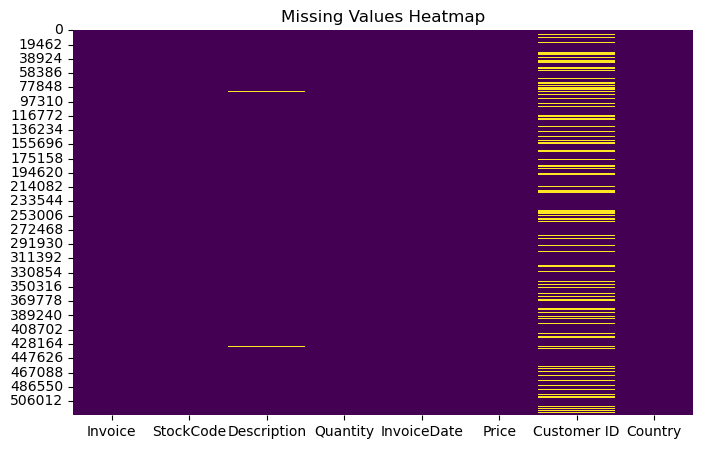

In [58]:
# Check missing values
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [59]:
df_delete = df.copy()
print(df_delete.isnull().sum())

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [60]:
df_cleaned = df_delete.dropna()

print(df_cleaned.isnull().sum())

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [61]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 417534 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      417534 non-null  object        
 1   StockCode    417534 non-null  object        
 2   Description  417534 non-null  object        
 3   Quantity     417534 non-null  int64         
 4   InvoiceDate  417534 non-null  datetime64[ns]
 5   Price        417534 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      417534 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.7+ MB
None


# 1. Revenue 
Quantity * Price

In [62]:
df_cleaned.loc[:, "Revenue"] = df_cleaned["Quantity"] * df_cleaned["Price"]

C:\Users\cbech\AppData\Local\Temp\ipykernel_21616\3469653783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, "Revenue"] = df_cleaned["Quantity"] * df_cleaned["Price"]


# 2. DayOfWeek: to analyze sales trends by weekdays
Extract Day of the Week from InvoiceDate

In [63]:
df_cleaned.loc[:, "DayOfWeek"] = df_cleaned["InvoiceDate"].dt.day_name()

C:\Users\cbech\AppData\Local\Temp\ipykernel_21616\761687954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, "DayOfWeek"] = df_cleaned["InvoiceDate"].dt.day_name()


# 3. TotalRevenue for each CustomerID

In [64]:
customer_revenue = df_cleaned.groupby("Customer ID")["Revenue"].sum().reset_index()
customer_revenue.rename(columns={"Revenue": "TotalRevenue"}, inplace=True)

# 4. Most popular product based on Revenue.

In [65]:
popular_product = df_cleaned.groupby(["StockCode", "Description"])["Revenue"].sum().reset_index()
popular_product = popular_product.sort_values(by="Revenue", ascending=False)
# The top product
most_popular_product = popular_product.iloc[0]  

# 5. Ordersize by summing Quantity for each InvoiceNo

In [66]:
order_size = df_cleaned.groupby("Invoice")["Quantity"].sum().reset_index()
order_size.rename(columns={"Quantity": "OrderSize"}, inplace=True)

In [67]:
# Display sample rows with new features
display(df_cleaned.head())

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,DayOfWeek
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,Tuesday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,Tuesday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,Tuesday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,Tuesday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,Tuesday


In [68]:
# Print Most Popular Product Information
print("Most Popular Product Based on Revenue:")
print(most_popular_product)

Most Popular Product Based on Revenue:
StockCode                                  85123A
Description    WHITE HANGING HEART T-LIGHT HOLDER
Revenue                                 148876.66
Name: 4088, dtype: object


In [69]:
df_cleaned = df_cleaned.merge(customer_revenue, on="Customer ID", how="left")
df_cleaned = df_cleaned.merge(order_size, on="Invoice", how="left")

In [70]:
display(df_cleaned.head())

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,DayOfWeek,TotalRevenue,OrderSize
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,Tuesday,1187.08,166
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,Tuesday,1187.08,166
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,Tuesday,1187.08,166
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,Tuesday,1187.08,166
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,Tuesday,1187.08,166


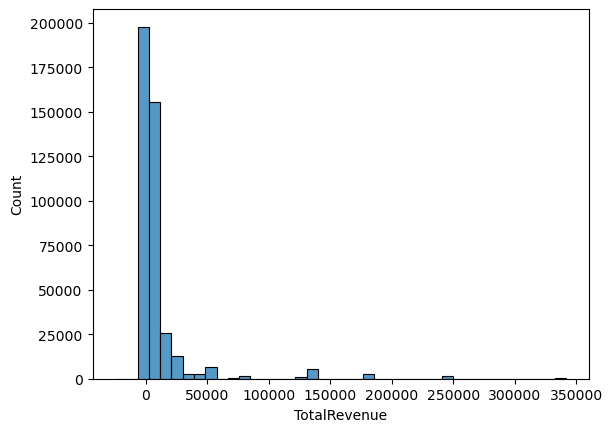

In [71]:
sns.histplot(x='TotalRevenue', data=df_cleaned, bins=40)
plt.show()

In [72]:
df_cleaned.loc[df_cleaned['TotalRevenue'].idxmax()]

Invoice                          489438
StockCode                         21329
Description     DINOSAURS  WRITING SET 
Quantity                             28
InvoiceDate         2009-12-01 09:24:00
Price                              0.98
Customer ID                     18102.0
Country                  United Kingdom
Revenue                           27.44
DayOfWeek                       Tuesday
TotalRevenue                  341776.73
OrderSize                           826
Name: 54, dtype: object

## Making customer segments using lambda

In [73]:
def segment_customer(revenue):
    if revenue >= 10000:
        return "High"
    elif revenue >= 1000:
        return "Medium"
    else:
        return "Low"

# Apply the segmentation to the 'TotalRevenue' column
df_cleaned["CustomerSegment"] = df_cleaned["TotalRevenue"].apply(lambda x: segment_customer(x) if pd.notnull(x) else "Unknown")

# Display sample rows with the new segment
display(df_cleaned[["Customer ID", "TotalRevenue", "CustomerSegment"]].drop_duplicates().head())

# Check segment distribution
print(df_cleaned["CustomerSegment"].value_counts())

,Customer ID,TotalRevenue,CustomerSegment
0,13085.0,1187.08,Medium
12,13078.0,16451.55,High
31,15362.0,613.08,Low
54,18102.0,341776.73,High
71,12682.0,11657.59,High


CustomerSegment
Medium    253965
Low        92577
High       70992
Name: count, dtype: int64


In [74]:
df_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,DayOfWeek,TotalRevenue,OrderSize,CustomerSegment
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,Tuesday,1187.08,166,Medium
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,Tuesday,1187.08,166,Medium
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,Tuesday,1187.08,166,Medium
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,Tuesday,1187.08,166,Medium
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,Tuesday,1187.08,166,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
417529,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90,Thursday,755.56,194,Low
417530,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,Thursday,755.56,194,Low
417531,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,Thursday,755.56,194,Low
417532,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50,Thursday,755.56,194,Low


## Extract key information from Description and add them as columns (e.g., presence of specific keywords like "Gift" or "Discount"). At least one extra column should be added

In [75]:
# Apply the function to create the new column
df_cleaned["KeywordCategory"] = df_cleaned["Description"].apply(lambda description: "Gift" if "gift" in description.lower() else ("Discount" if "discount" in description.lower() else "None"))

# Display sample rows with the new column
display(df_cleaned[["Description", "KeywordCategory"]].head())

# Check the distribution of the new column
print(df_cleaned["KeywordCategory"].value_counts())


,Description,KeywordCategory
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,None
1,PINK CHERRY LIGHTS,None
2,WHITE CHERRY LIGHTS,None
3,"RECORD FRAME 7"" SINGLE SIZE",None
4,STRAWBERRY CERAMIC TRINKET BOX,None


KeywordCategory
None        413060
Gift          4377
Discount        97
Name: count, dtype: int64


In [76]:
df_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,DayOfWeek,TotalRevenue,OrderSize,CustomerSegment,KeywordCategory
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,Tuesday,1187.08,166,Medium,None
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,Tuesday,1187.08,166,Medium,None
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,Tuesday,1187.08,166,Medium,None
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,Tuesday,1187.08,166,Medium,None
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,Tuesday,1187.08,166,Medium,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417529,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90,Thursday,755.56,194,Low,None
417530,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,Thursday,755.56,194,Low,None
417531,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,Thursday,755.56,194,Low,None
417532,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50,Thursday,755.56,194,Low,None


## Categorize transactions as "Small", "Medium", or "Large" based on Revenue.

In [77]:
def categorize_transaction(revenue):
    if revenue >= 100:
        return "Large"
    elif revenue >= 50:
        return "Medium"
    else:
        return "Small"

# Apply the categorization to the 'Revenue' column
df_cleaned["TransactionCategory"] = df_cleaned["Revenue"].apply(lambda x: categorize_transaction(x) if pd.notnull(x) else "Unknown")

# Display sample rows with the new transaction category
display(df_cleaned[["Invoice", "Revenue", "TransactionCategory"]].head())

# Check transaction category distribution
print(df_cleaned["TransactionCategory"].value_counts())

,Invoice,Revenue,TransactionCategory
0,489434,83.4,Medium
1,489434,81.0,Medium
2,489434,81.0,Medium
3,489434,100.8,Large
4,489434,30.0,Small


TransactionCategory
Small     388108
Medium     17439
Large      11987
Name: count, dtype: int64


In [78]:
df_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,DayOfWeek,TotalRevenue,OrderSize,CustomerSegment,KeywordCategory,TransactionCategory
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,Tuesday,1187.08,166,Medium,None,Medium
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,Tuesday,1187.08,166,Medium,None,Medium
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,Tuesday,1187.08,166,Medium,None,Medium
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,Tuesday,1187.08,166,Medium,None,Large
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,Tuesday,1187.08,166,Medium,None,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417529,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90,Thursday,755.56,194,Low,None,Small
417530,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,Thursday,755.56,194,Low,None,Small
417531,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,Thursday,755.56,194,Low,None,Small
417532,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50,Thursday,755.56,194,Low,None,Small


## **Detect Seasonal Items:** Flag items as "Christmas"-themed if the description contains relevant words.

In [79]:
# Define a function to flag Christmas-themed items
def flag_christmas(description):
    christmas_keywords = ["christmas", "xmas", "santa", "snow", "reindeer"]
    if any(keyword in description.lower() for keyword in christmas_keywords):
        return "Christmas"
    else:
        return "Non-Christmas"

# Apply the function to the 'Description' column
df_cleaned["ChristmasFlag"] = df_cleaned["Description"].apply(lambda x: flag_christmas(x) if pd.notnull(x) else "Unknown")

# Display sample rows with the new flag
display(df_cleaned[["Description", "ChristmasFlag"]].head())

# Check the distribution of the new flag
print(df_cleaned["ChristmasFlag"].value_counts())

,Description,ChristmasFlag
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,Christmas
1,PINK CHERRY LIGHTS,Non-Christmas
2,WHITE CHERRY LIGHTS,Non-Christmas
3,"RECORD FRAME 7"" SINGLE SIZE",Non-Christmas
4,STRAWBERRY CERAMIC TRINKET BOX,Non-Christmas


ChristmasFlag
Non-Christmas    400370
Christmas         17164
Name: count, dtype: int64


In [80]:
df_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,DayOfWeek,TotalRevenue,OrderSize,CustomerSegment,KeywordCategory,TransactionCategory,ChristmasFlag
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,Tuesday,1187.08,166,Medium,None,Medium,Christmas
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,Tuesday,1187.08,166,Medium,None,Medium,Non-Christmas
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,Tuesday,1187.08,166,Medium,None,Medium,Non-Christmas
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,Tuesday,1187.08,166,Medium,None,Large,Non-Christmas
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,Tuesday,1187.08,166,Medium,None,Small,Non-Christmas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417529,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90,Thursday,755.56,194,Low,None,Small,Non-Christmas
417530,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,Thursday,755.56,194,Low,None,Small,Non-Christmas
417531,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,Thursday,755.56,194,Low,None,Small,Non-Christmas
417532,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50,Thursday,755.56,194,Low,None,Small,Non-Christmas


## Classify customers as "Loyal", "Occasional", or "One-time" based on the number of purchases.

In [81]:
# Count the number of purchases for each customer
purchase_counts = df_cleaned.groupby("Customer ID")["Invoice"].nunique().reset_index()
purchase_counts.rename(columns={"Invoice": "PurchaseCount"}, inplace=True)

# Define a function to classify customers based on the number of purchases
def classify_customer(purchase_count):
    if purchase_count >= 10:
        return "Loyal"
    elif purchase_count >= 2:
        return "Occasional"
    else:
        return "One-time"

# Apply the classification to the 'PurchaseCount' column
purchase_counts["CustomerType"] = purchase_counts["PurchaseCount"].apply(lambda x: classify_customer(x))

# Merge the 'CustomerType' column to the main dataframe
df_cleaned = df_cleaned.merge(purchase_counts[["Customer ID", "CustomerType"]], on="Customer ID", how="left")

# Display sample rows with the new customer type
display(df_cleaned[["Customer ID", "CustomerType"]].drop_duplicates().head())

# Check customer type distribution
print(df_cleaned["CustomerType"].value_counts())

,Customer ID,CustomerType
0,13085.0,Occasional
12,13078.0,Loyal
31,15362.0,Occasional
54,18102.0,Loyal
71,12682.0,Loyal


CustomerType
Loyal         196302
Occasional    194607
One-time       26625
Name: count, dtype: int64


In [82]:
df_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,DayOfWeek,TotalRevenue,OrderSize,CustomerSegment,KeywordCategory,TransactionCategory,ChristmasFlag,CustomerType
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,Tuesday,1187.08,166,Medium,None,Medium,Christmas,Occasional
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,Tuesday,1187.08,166,Medium,None,Medium,Non-Christmas,Occasional
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,Tuesday,1187.08,166,Medium,None,Medium,Non-Christmas,Occasional
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,Tuesday,1187.08,166,Medium,None,Large,Non-Christmas,Occasional
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,Tuesday,1187.08,166,Medium,None,Small,Non-Christmas,Occasional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417529,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90,Thursday,755.56,194,Low,None,Small,Non-Christmas,Occasional
417530,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,Thursday,755.56,194,Low,None,Small,Non-Christmas,Occasional
417531,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,Thursday,755.56,194,Low,None,Small,Non-Christmas,Occasional
417532,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50,Thursday,755.56,194,Low,None,Small,Non-Christmas,Occasional


## Flag invoices with multiple unique items as "Multi-Item Order".

In [83]:
# flag invoices with multiple unique items as 'MultipleItems'
invoice_items = df_cleaned.groupby("Invoice")["StockCode"].nunique().reset_index()
invoice_items.rename(columns={"StockCode": "UniqueItems"}, inplace=True)
invoice_items["InvoiceType"] = invoice_items["UniqueItems"].apply(lambda x: "MultipleItems" if x > 1 else "SingleItem")

# Merge the 'InvoiceType' column to the main dataframe
df_cleaned = df_cleaned.merge(invoice_items[["Invoice", "InvoiceType"]], on="Invoice", how="left")

# Display sample rows with the new invoice type
display(df_cleaned[["Invoice", "InvoiceType"]].head())

# Check invoice type distribution
print(df_cleaned["InvoiceType"].value_counts())



,Invoice,InvoiceType
0,489434,MultipleItems
1,489434,MultipleItems
2,489434,MultipleItems
3,489434,MultipleItems
4,489434,MultipleItems


InvoiceType
MultipleItems    413275
SingleItem         4259
Name: count, dtype: int64


In [84]:
df_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,DayOfWeek,TotalRevenue,OrderSize,CustomerSegment,KeywordCategory,TransactionCategory,ChristmasFlag,CustomerType,InvoiceType
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,Tuesday,1187.08,166,Medium,None,Medium,Christmas,Occasional,MultipleItems
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,Tuesday,1187.08,166,Medium,None,Medium,Non-Christmas,Occasional,MultipleItems
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,Tuesday,1187.08,166,Medium,None,Medium,Non-Christmas,Occasional,MultipleItems
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,Tuesday,1187.08,166,Medium,None,Large,Non-Christmas,Occasional,MultipleItems
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,Tuesday,1187.08,166,Medium,None,Small,Non-Christmas,Occasional,MultipleItems
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417529,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90,Thursday,755.56,194,Low,None,Small,Non-Christmas,Occasional,MultipleItems
417530,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,Thursday,755.56,194,Low,None,Small,Non-Christmas,Occasional,MultipleItems
417531,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,Thursday,755.56,194,Low,None,Small,Non-Christmas,Occasional,MultipleItems
417532,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50,Thursday,755.56,194,Low,None,Small,Non-Christmas,Occasional,MultipleItems


## Wrap all fo the above into an ETL pipeline

In [85]:
def extract(dataset_path):
    # Read the dataset from an Excel file
    df = pd.read_excel(dataset_path)
    return df

def transform(df):
    # Handling Missing Values
    df_delete = df.copy()
    df_cleaned = df_delete.dropna()

    # Feature Engineering
    df_cleaned["Revenue"] = df_cleaned["Quantity"] * df_cleaned["Price"]
    df_cleaned["DayOfWeek"] = df_cleaned["InvoiceDate"].dt.day_name()

    # Calculate total revenue per customer
    customer_revenue = df_cleaned.groupby("Customer ID")["Revenue"].sum().reset_index()
    customer_revenue.rename(columns={"Revenue": "TotalRevenue"}, inplace=True)

    # Identify the most popular product
    popular_product = df_cleaned.groupby(["StockCode", "Description"])["Revenue"].sum().reset_index()
    popular_product = popular_product.sort_values(by="Revenue", ascending=False)
    most_popular_product = popular_product.iloc[0]

    # Calculate order size per invoice
    order_size = df_cleaned.groupby("Invoice")["Quantity"].sum().reset_index()
    order_size.rename(columns={"Quantity": "OrderSize"}, inplace=True)

    # Merge calculated features back to the main dataframe
    df_cleaned = df_cleaned.merge(customer_revenue, on="Customer ID", how="left")
    df_cleaned = df_cleaned.merge(order_size, on="Invoice", how="left")

    # Segment customers based on total revenue
    def segment_customer(revenue):
        if revenue >= 10000:
            return "High"
        elif revenue >= 1000:
            return "Medium"
        else:
            return "Low"

    df_cleaned["CustomerSegment"] = df_cleaned["TotalRevenue"].apply(lambda x: segment_customer(x) if pd.notnull(x) else "Unknown")

    # Categorize products based on keywords in the description
    df_cleaned["KeywordCategory"] = df_cleaned["Description"].apply(lambda description: "Gift" if "gift" in description.lower() else ("Discount" if "discount" in description.lower() else "None"))

    # Categorize transactions based on revenue
    def categorize_transaction(revenue):
        if revenue >= 100:
            return "Large"
        elif revenue >= 50:
            return "Medium"
        else:
            return "Small"

    df_cleaned["TransactionCategory"] = df_cleaned["Revenue"].apply(lambda x: categorize_transaction(x) if pd.notnull(x) else "Unknown")

    # Flag Christmas-themed items
    def flag_christmas(description):
        christmas_keywords = ["christmas", "xmas", "santa", "snow", "reindeer"]
        if any(keyword in description.lower() for keyword in christmas_keywords):
            return "Christmas"
        else:
            return "Non-Christmas"

    df_cleaned["ChristmasFlag"] = df_cleaned["Description"].apply(lambda x: flag_christmas(x) if pd.notnull(x) else "Unknown")

    # Count the number of purchases per customer
    purchase_counts = df_cleaned.groupby("Customer ID")["Invoice"].nunique().reset_index()
    purchase_counts.rename(columns={"Invoice": "PurchaseCount"}, inplace=True)

    # Classify customers based on the number of purchases
    def classify_customer(purchase_count):
        if purchase_count >= 10:
            return "Loyal"
        elif purchase_count >= 2:
            return "Occasional"
        else:
            return "One-time"

    purchase_counts["CustomerType"] = purchase_counts["PurchaseCount"].apply(lambda x: classify_customer(x))
    df_cleaned = df_cleaned.merge(purchase_counts[["Customer ID", "CustomerType"]], on="Customer ID", how="left")

    # Flag invoices with multiple unique items
    invoice_items = df_cleaned.groupby("Invoice")["StockCode"].nunique().reset_index()
    invoice_items.rename(columns={"StockCode": "UniqueItems"}, inplace=True)
    invoice_items["InvoiceType"] = invoice_items["UniqueItems"].apply(lambda x: "MultipleItems" if x > 1 else "SingleItem")
    df_cleaned = df_cleaned.merge(invoice_items[["Invoice", "InvoiceType"]], on="Invoice", how="left")

    return df_cleaned

def load(df, output_path):
    # Save the transformed dataframe to a CSV file
    df.to_csv(output_path, index=False)
    print("Data saved")
    return df

def ETL(dataset_path, output_path):
    # Execute the ETL process
    df = extract(dataset_path)
    df_transformed = transform(df)
    df_loaded = load(df_transformed, output_path)
    return df_loaded


In [ ]:
# Define the dataset path and output path
# define yoyr own paths
dataset_path = 'C:\\Users\\cbech\\Data_and_Things\\Data and Things Exam\\online_retail_II.xlsx'
output_path = 'C:\\Users\\cbech\\Data_and_Things\\Data and Things Exam\\transformed_dataset.csv'
# Example usage
df = ETL(dataset_path, output_path)


C:\Users\cbech\AppData\Local\Temp\ipykernel_21616\827401675.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Revenue"] = df_cleaned["Quantity"] * df_cleaned["Price"]
C:\Users\cbech\AppData\Local\Temp\ipykernel_21616\827401675.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["DayOfWeek"] = df_cleaned["InvoiceDate"].dt.day_name()


Data saved


In [87]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,DayOfWeek,TotalRevenue,OrderSize,CustomerSegment,KeywordCategory,TransactionCategory,ChristmasFlag,CustomerType,InvoiceType
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,Tuesday,1187.08,166,Medium,None,Medium,Christmas,Occasional,MultipleItems
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,Tuesday,1187.08,166,Medium,None,Medium,Non-Christmas,Occasional,MultipleItems
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,Tuesday,1187.08,166,Medium,None,Medium,Non-Christmas,Occasional,MultipleItems
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,Tuesday,1187.08,166,Medium,None,Large,Non-Christmas,Occasional,MultipleItems
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,Tuesday,1187.08,166,Medium,None,Small,Non-Christmas,Occasional,MultipleItems
